In [12]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [16]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define directories for dataset and paths for model saving
dataset_dir = 'D:/Research/Tomato_leaf_disease_recognition/images'  # Replace with the path to your dataset
model_save_path = 'tomato_leaf_disease_model12.keras'

# Print all classes in the dataset
class_labels = train_generator.class_indices
print("Classes in the dataset:")
for class_name, class_index in class_labels.items():
    print(f"{class_index}: {class_name}")



# Preprocess data and split into training and validation sets
img_height, img_width = 150, 150
batch_size = 32

# ImageDataGenerator for image augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Set aside 20% for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create training and validation data generators
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Set as training data
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Number of classes in your dataset
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks for early stopping and saving the best model
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath=model_save_path, monitor='val_accuracy', save_best_only=True)

]

Classes in the dataset:
0: images
Found 20682 images belonging to 11 classes.
Found 5165 images belonging to 11 classes.


In [17]:

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=callbacks
)


Epoch 1/30
647/647 ━━━━━━━━━━━━━━━━━━━━ 713s 1s/step - accuracy: 0.2463 - loss: 2.1100 - val_accuracy: 0.6254 - val_loss: 1.0722
Epoch 2/30
647/647 ━━━━━━━━━━━━━━━━━━━━ 487s 750ms/step - accuracy: 0.5321 - loss: 1.3382 - val_accuracy: 0.7119 - val_loss: 0.8460
Epoch 3/30
647/647 ━━━━━━━━━━━━━━━━━━━━ 445s 685ms/step - accuracy: 0.5956 - loss: 1.1348 - val_accuracy: 0.7216 - val_loss: 0.8254
Epoch 4/30
647/647 ━━━━━━━━━━━━━━━━━━━━ 486s 749ms/step - accuracy: 0.6306 - loss: 1.0448 - val_accuracy: 0.7553 - val_loss: 0.7170
Epoch 5/30
647/647 ━━━━━━━━━━━━━━━━━━━━ 410s 632ms/step - accuracy: 0.6678 - loss: 0.9465 - val_accuracy: 0.8130 - val_loss: 0.5561
Epoch 6/30
647/647 ━━━━━━━━━━━━━━━━━━━━ 482s 744ms/step - accuracy: 0.6902 - loss: 0.8863 - val_accuracy: 0.8275 - val_loss: 0.5186
Epoch 7/30
647/647 ━━━━━━━━━━━━━━━━━━━━ 471s 726ms/step - accuracy: 0.6992 - loss: 0.8315 - val_accuracy: 0.8052 - val_loss: 0.5347
Epoch 8/30
647/647 ━━━━━━━━━━━━━━━━━━━━ 454s 699ms/step - accuracy: 0.7130 - lo

In [18]:
model.save(model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to tomato_leaf_disease_model12.keras


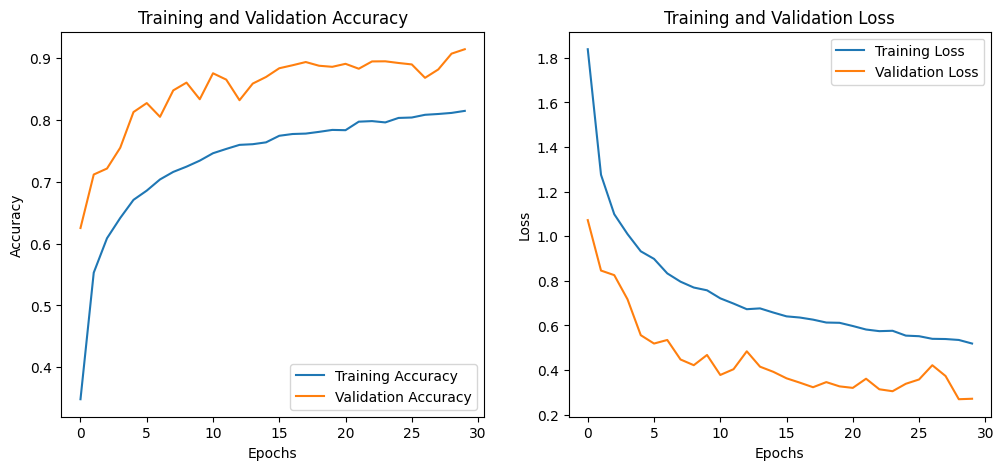

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")


162/162 ━━━━━━━━━━━━━━━━━━━━ 33s 206ms/step - accuracy: 0.9068 - loss: 0.2699
Validation Loss: 0.2809, Validation Accuracy: 0.9030


In [22]:
# Function to predict the class of a new image
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_disease(img_path, model, class_indices):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    class_name = {v: k for k, v in class_indices.items()}[predicted_class[0]]
    
    return class_name, prediction[0][predicted_class[0]]

# Load the saved model and make predictions on a new image
loaded_model = tf.keras.models.load_model(model_save_path)
class_indices = train_generator.class_indices  # Dictionary mapping class indices to class names

# Example usage:
image_path = 'D:/Research/Tomato_leaf_disease_recognition/images/Spider_mites Two-spotted_spider_mite/0a1c03ea-1a2d-449e-bcc4-4a8b62febf88___Com.G_SpM_FL 9433_flipTB.JPG'  # Replace with path to a test image
predicted_class, confidence = predict_disease(image_path, loaded_model, class_indices)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted Class: Spider_mites Two-spotted_spider_mite, Confidence: 1.00
